In [1]:
! module load ffmpeg
import os
import re 
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

import xarray as xr
import cartopy.crs as ccrs
BASE_DIR = f"/scratch/users/robcking/am4_error_growth_full/"
plt.rcParams['animation.ffmpeg_path'] ='/share/software/user/open/ffmpeg/5.0/bin/ffmpeg'

In [2]:
ctl_jan = xr.open_dataset(os.path.join(BASE_DIR,'jan','ctl','atmos_4xdaily.nc'),decode_times=False)
ctl_jul = xr.open_dataset(os.path.join(BASE_DIR,'jul','ctl','atmos_4xdaily.nc'),decode_times=False)

/tmp/ipykernel_14640/4088740009.py:16: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  return CS.collections


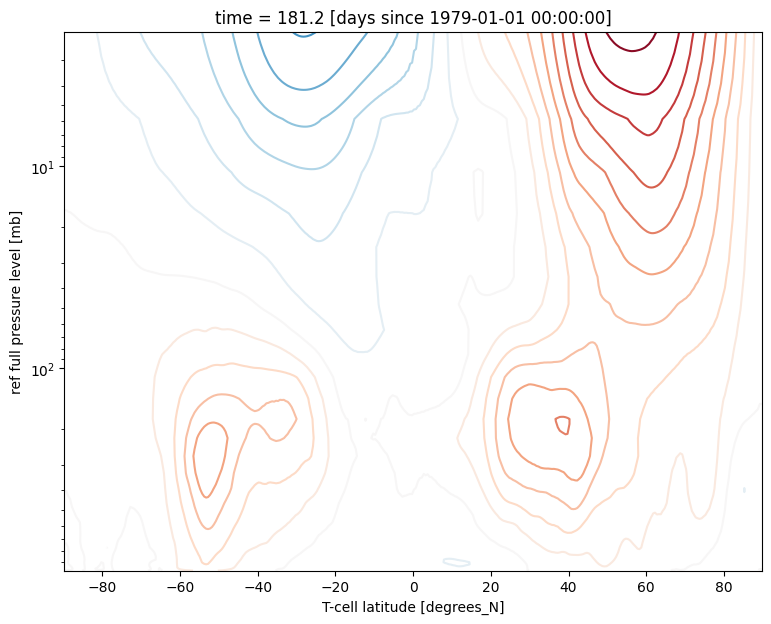

In [3]:
from matplotlib.animation import FuncAnimation

jul_zonal = ctl_jul.ucomp.mean(dim='grid_xt')


fig = plt.figure(figsize=(9,7))
ax = plt.axes()

CS = jul_zonal.isel(time=0).plot.contour(ax=ax,levels=20,x='grid_yt',y='pfull',yincrease=False,yscale='log')

def animate(i):
    # rmse_avg.u_ref.isel(time=0).plot.imshow(ax=ax,vmin=0,vmax=20,transform=ccrs.PlateCarree(central_longitude=180),animated=True)
    ax.cla()
    ax.set_title("jul zonal average u : {i/4} days")
    CS = jul_zonal.isel(time=i).plot.contour(ax=ax,levels=20,x='grid_yt',y='pfull',yincrease=False,yscale='log')
    return CS.collections
ani = FuncAnimation(fig,animate,frames=len(jul_zonal.time))
ani.save('jul/jul_ucomp_evolution.mp4')